In [3]:
import pandas as pd
import numpy as np
import os, sys

os.getcwd()
rpath = os.path.abspath('../')
if rpath not in sys.path:
    sys.path.insert(0,rpath)

# Load the .txt file
# Construct the file path
train_path = os.path.join(rpath, 'data', 'train.csv')
train_data = pd.read_csv(train_path)  # Tab-delimited

train_data.head()

C:\Users\AII\AppData\Local\Temp\ipykernel_7056\893596597.py:13: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv(train_path)  # Tab-delimited


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
store_path = os.path.join(rpath, 'data', 'store.csv')
store_data = pd.read_csv(store_path)  # Tab-delimited

store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [5]:
test_data = os.path.join(rpath, 'data', 'test.csv')
test_data = pd.read_csv(test_data)  # Tab-delimited

test_data.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


**Merging the dataset**

In [6]:
merged_train_df = train_data.merge(store_data, how='left', on='Store')
merged_train_df['Date'] = pd.to_datetime(merged_train_df['Date'], format='%Y-%m-%d')
merged_train_df = merged_train_df.set_index('Date')
merged_train_df

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Date,,,,,,,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2015-07-31,2,5,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2015-07-31,3,5,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2015-07-31,4,5,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
2015-07-31,5,5,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-01-01,1111,2,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
2013-01-01,1112,2,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
2013-01-01,1113,2,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


In [7]:
merged_test_df = test_data.merge(store_data, how='left', on='Store')
merged_test_df['Date'] = pd.to_datetime(merged_test_df['Date'], format='%Y-%m-%d')
merged_test_df = merged_test_df.set_index('Date')
merged_test_df

,Id,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Date,,,,,,,,,,,,,,,,
2015-09-17,1,1,4,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2015-09-17,2,3,4,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2015-09-17,3,7,4,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
2015-09-17,4,8,4,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
2015-09-17,5,9,4,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-08-01,41084,1111,6,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
2015-08-01,41085,1112,6,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
2015-08-01,41086,1113,6,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


**Handling Missing Data**

In [8]:
#Lets find out the missing values and how much of it
from scripts.data_handling import missing_values_table, handling_missing_data
missing_values_traindf = missing_values_table(merged_train_df)
missing_values_testdf = missing_values_table(merged_test_df)
print("Missing Values in train df:")
print(missing_values_traindf)

print("Missing Values in test df:")
print(missing_values_testdf)

Your selected dataframe has 17 columns.
There are 6 columns that have missing values.
Your selected dataframe has 16 columns.
There are 7 columns that have missing values.
Missing Values in train df:
                           Missing Values  % of Total Values    Dtype
Promo2SinceYear                    508031               49.9  float64
Promo2SinceWeek                    508031               49.9  float64
PromoInterval                      508031               49.9   object
CompetitionOpenSinceMonth          323348               31.8  float64
CompetitionOpenSinceYear           323348               31.8  float64
CompetitionDistance                  2642                0.3  float64
Missing Values in test df:
                           Missing Values  % of Total Values    Dtype
PromoInterval                       17232               41.9   object
Promo2SinceYear                     17232               41.9  float64
Promo2SinceWeek                     17232               41.9  float64
Com

In [10]:
merged_train_df = handling_missing_data(merged_train_df)
missing_values_df = missing_values_table(merged_train_df)
print("Missing Values in train df:")
print(missing_values_df)

c:\Users\AII\Desktop\sales-forecasting\scripts\data_handling.py:50: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  datacleaned[date_cols] = datacleaned[date_cols].fillna(method='ffill').fillna(method='bfill')


Your selected dataframe has 17 columns.
There are 0 columns that have missing values.
Missing Values in train df:
Empty DataFrame
Columns: [Missing Values, % of Total Values, Dtype]
Index: []


In [11]:
merged_test_df = handling_missing_data(merged_test_df)
missing_values_df = missing_values_table(merged_test_df)
print("Missing Values in test df:")
print(missing_values_df)

Your selected dataframe has 16 columns.
There are 0 columns that have missing values.
Missing Values in test df:
Empty DataFrame
Columns: [Missing Values, % of Total Values, Dtype]
Index: []


c:\Users\AII\Desktop\sales-forecasting\scripts\data_handling.py:50: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  datacleaned[date_cols] = datacleaned[date_cols].fillna(method='ffill').fillna(method='bfill')


**Statistical Analysis**

In [14]:
merged_train_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2015-07-31 to 2013-01-01
Data columns (total 17 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Sales                      1017209 non-null  int64  
 3   Customers                  1017209 non-null  int64  
 4   Open                       1017209 non-null  int64  
 5   Promo                      1017209 non-null  int64  
 6   StateHoliday               1017209 non-null  object 
 7   SchoolHoliday              1017209 non-null  int64  
 8   StoreType                  1017209 non-null  object 
 9   Assortment                 1017209 non-null  object 
 10  CompetitionDistance        1017209 non-null  float64
 11  CompetitionOpenSinceMonth  1017209 non-null  float64
 12  CompetitionOpenSinceYear   1017209 non-null  float64
 1

In [18]:
merged_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.415982e+03,4.926878e+00,1.370173e+03,5.005638e-01,1.164767e+01,1.007011e+03
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.710253e+03,4.283543e+00,9.353634e+02,4.999999e-01,1.532393e+01,1.005877e+03
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.320000e+03,4.000000e+00,2.006000e+03,1.000000e+00,1.000000e+00,2.009000e+03
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.880000e+03,9.000000e+00,2.011000e+03,1.000000e+00,2.200000e+01,2.012000e+03
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03


In [19]:
merged_train_df

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Date,,,,,,,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,unknown
2015-07-31,2,5,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2015-07-31,3,5,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2015-07-31,4,5,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,unknown
2015-07-31,5,5,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-01-01,1111,2,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
2013-01-01,1112,2,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,0.0,0.0,unknown
2013-01-01,1113,2,0,0,0,0,a,1,a,c,9260.0,0.0,0.0,0,0.0,0.0,unknown


In [20]:
merged_train_data = merged_train_df[merged_train_df.Open==1].copy()
merged_test_data = merged_test_df[merged_test_df.Open==1].copy()

* Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

Training set promo distribution:
Promo
0    55.364807
1    44.635193
Name: proportion, dtype: float64

Test set promo distribution:
Promo
0    53.700168
1    46.299832
Name: proportion, dtype: float64


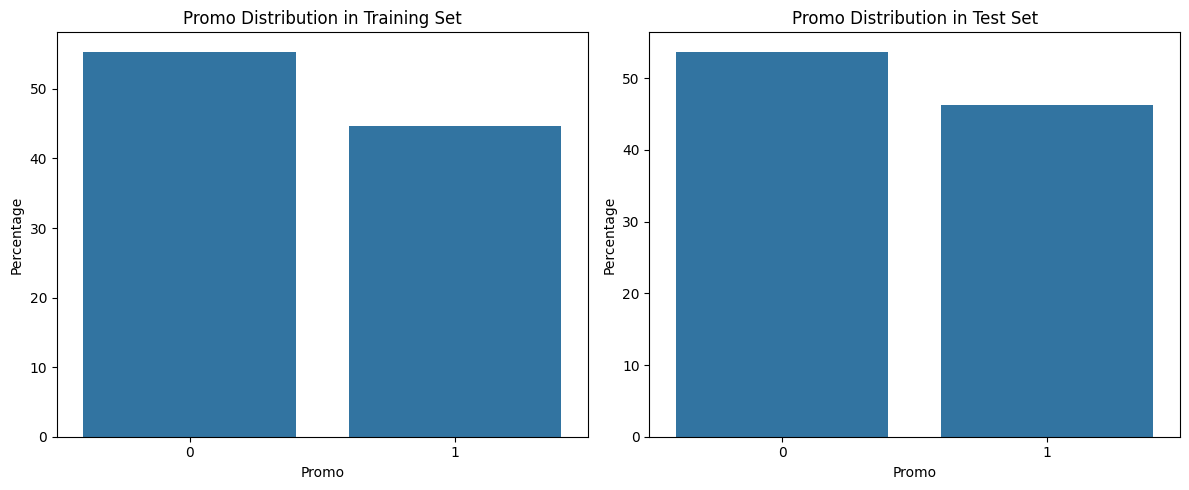

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the percentage of promotion days in training and test sets
train_promo_dist = merged_train_data['Promo'].value_counts(normalize=True) * 100
test_promo_dist = merged_test_data['Promo'].value_counts(normalize=True) * 100

print("Training set promo distribution:")
print(train_promo_dist)
print("\nTest set promo distribution:")
print(test_promo_dist)

# Plot Promo distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(x=train_promo_dist.index, y=train_promo_dist.values)
plt.title('Promo Distribution in Training Set')
plt.xlabel('Promo')
plt.ylabel('Percentage')

plt.subplot(1, 2, 2)
sns.barplot(x=test_promo_dist.index, y=test_promo_dist.values)
plt.title('Promo Distribution in Test Set')
plt.xlabel('Promo')
plt.ylabel('Percentage')

plt.tight_layout()
plt.show()


* Sales during weekDays, months and year

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

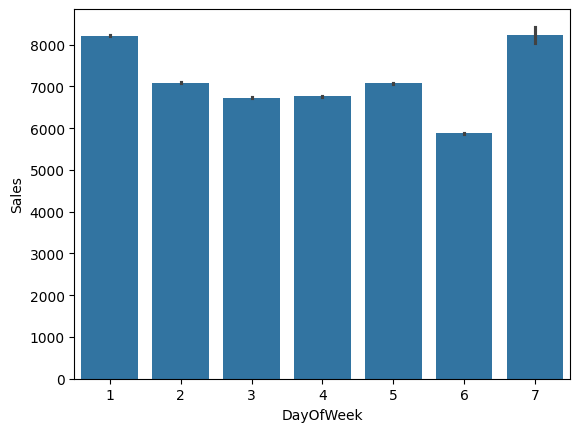

In [115]:
sns.barplot(data=merged_train_data, x='DayOfWeek', y='Sales')

In [116]:
merged_train_data['Day'] = merged_train_data.index.day
merged_train_data['Month'] = merged_train_data.index.month
merged_train_data['Year'] = merged_train_data.index.year

<Axes: xlabel='Year', ylabel='Sales'>

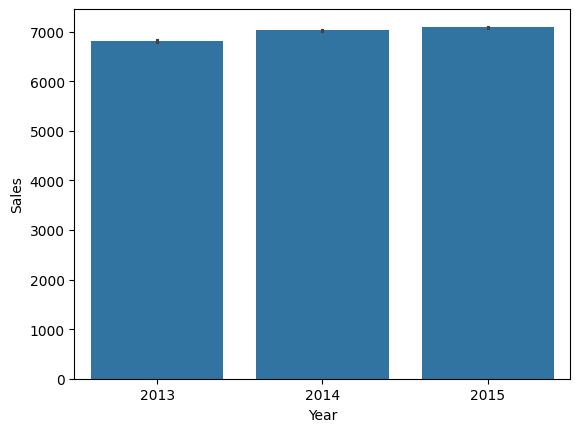

In [117]:
sns.barplot(data=merged_train_data, x='Year', y='Sales')

<Axes: xlabel='Month', ylabel='Sales'>

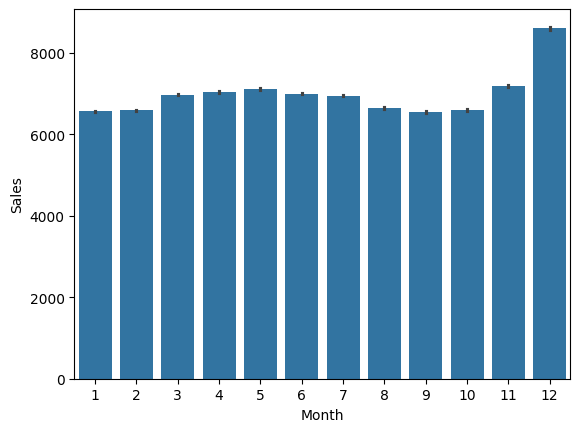

In [118]:
sns.barplot(data=merged_train_data, x='Month', y='Sales')

* Check & compare sales behavior before, during, and after holidays

In [28]:
merged_train_data.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [40]:
# Convert the StateHoliday column to string
merged_train_data['StateHoliday'] = merged_train_data['StateHoliday'].astype(str)

# Verify unique values again
print(merged_train_data['StateHoliday'].unique())


['0' 'a' 'b' 'c']


In [41]:
# Create a binary indicator for StateHoliday (1 for any holiday, 0 for no holiday)
merged_train_data['IsStateHoliday'] = merged_train_data['StateHoliday'].apply(lambda x: 1 if x != '0' else 0)

# Check the distribution
print(merged_train_data['IsStateHoliday'].value_counts())


IsStateHoliday
0    843482
1       910
Name: count, dtype: int64


In [42]:
# Check the distribution of SchoolHoliday
print(merged_train_data['SchoolHoliday'].value_counts())


SchoolHoliday
0    680935
1    163457
Name: count, dtype: int64


In [43]:
# Re-check unique values
print("Unique values in StateHoliday:", merged_train_data['StateHoliday'].unique())
print("Unique values in SchoolHoliday:", merged_train_data['SchoolHoliday'].unique())


Unique values in StateHoliday: ['0' 'a' 'b' 'c']
Unique values in SchoolHoliday: [1 0]


In [44]:
# Create columns to mark holidays
merged_train_data['StateHoliday_before'] = merged_train_data['StateHoliday'].shift(1)
merged_train_data['StateHoliday_after'] = merged_train_data['StateHoliday'].shift(-1)

merged_train_data['SchoolHoliday_before'] = merged_train_data['SchoolHoliday'].shift(1)
merged_train_data['SchoolHoliday_after'] = merged_train_data['SchoolHoliday'].shift(-1)

# Filter only the rows when stores were open (since closed stores would have 0 sales)
merged_train_data = merged_train_data[merged_train_data['Open'] == 1]



In [45]:
# Sales during holidays (State and School holidays combined)
during_holiday_sales = merged_train_data[(merged_train_data['StateHoliday'] != '0') | (merged_train_data['SchoolHoliday'] == 1)]

# Sales before holidays
before_holiday_sales = merged_train_data[(merged_train_data['StateHoliday_before'] != '0') | (merged_train_data['SchoolHoliday_before'] == 1)]

# Sales after holidays
after_holiday_sales = merged_train_data[(merged_train_data['StateHoliday_after'] != '0') | (merged_train_data['SchoolHoliday_after'] == 1)]


In [46]:
# Calculate mean sales for each period
before_sales_mean = before_holiday_sales['Sales'].mean()
during_sales_mean = during_holiday_sales['Sales'].mean()
after_sales_mean = after_holiday_sales['Sales'].mean()

print(f"Average sales before holidays: {before_sales_mean}")
print(f"Average sales during holidays: {during_sales_mean}")
print(f"Average sales after holidays: {after_sales_mean}")


Average sales before holidays: 7254.656598782101
Average sales during holidays: 7205.836516247798
Average sales after holidays: 7258.493767258142


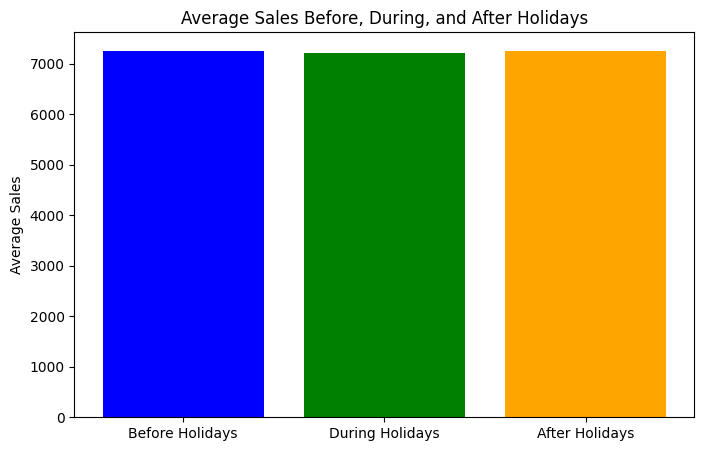

In [47]:
import matplotlib.pyplot as plt

# Create a bar plot to visualize sales behavior
sales_means = [before_sales_mean, during_sales_mean, after_sales_mean]
labels = ['Before Holidays', 'During Holidays', 'After Holidays']

plt.figure(figsize=(8, 5))
plt.bar(labels, sales_means, color=['blue', 'green', 'orange'])
plt.title('Average Sales Before, During, and After Holidays')
plt.ylabel('Average Sales')
plt.show()


In [50]:
# Convert StateHoliday to binary (1 if holiday, 0 if not)
merged_train_data['IsStateHoliday'] = merged_train_data['StateHoliday'].apply(lambda x: 0 if x == '0' else 1)

# Group by StoreType and calculate the mean of Sales, IsStateHoliday, and SchoolHoliday
store_sales_comparison = merged_train_data.groupby('StoreType').agg({
    'Sales': 'mean',
    'IsStateHoliday': 'mean',  # Use binary holiday indicator
    'SchoolHoliday': 'mean'
})

print(store_sales_comparison)



                  Sales  IsStateHoliday  SchoolHoliday
StoreType                                             
a           6925.167661        0.000604       0.194300
b          10231.407505        0.028979       0.184926
c           6932.512755        0.000575       0.196357
d           6822.141881        0.000456       0.191615


* Find out any seasonal (Christmas, Easter, etc) purchase behaviors

In [51]:
# Separate sales data for Christmas ('c'), Easter ('b'), and Public holidays ('a')
christmas_sales = merged_train_data[merged_train_data['StateHoliday'] == 'c']
easter_sales = merged_train_data[merged_train_data['StateHoliday'] == 'b']
public_holiday_sales = merged_train_data[merged_train_data['StateHoliday'] == 'a']

# Get non-holiday sales for comparison (StateHoliday == '0')
non_holiday_sales = merged_train_data[merged_train_data['StateHoliday'] == '0']

# Calculate average sales for each type of holiday and non-holidays
avg_sales_christmas = christmas_sales['Sales'].mean()
avg_sales_easter = easter_sales['Sales'].mean()
avg_sales_public_holiday = public_holiday_sales['Sales'].mean()
avg_sales_non_holiday = non_holiday_sales['Sales'].mean()

# Print results
print(f"Average sales during Christmas: {avg_sales_christmas}")
print(f"Average sales during Easter: {avg_sales_easter}")
print(f"Average sales during public holidays: {avg_sales_public_holiday}")
print(f"Average sales on non-holiday days: {avg_sales_non_holiday}")


Average sales during Christmas: 9743.74647887324
Average sales during Easter: 9887.889655172414
Average sales during public holidays: 8487.471181556197
Average sales on non-holiday days: 6953.515034108612


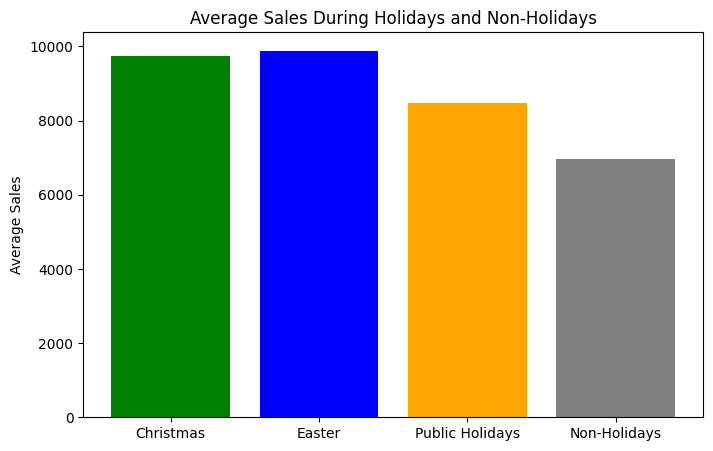

In [52]:
import matplotlib.pyplot as plt

# Data for plotting
sales_means = [avg_sales_christmas, avg_sales_easter, avg_sales_public_holiday, avg_sales_non_holiday]
labels = ['Christmas', 'Easter', 'Public Holidays', 'Non-Holidays']

# Create bar chart
plt.figure(figsize=(8, 5))
plt.bar(labels, sales_means, color=['green', 'blue', 'orange', 'gray'])
plt.title('Average Sales During Holidays and Non-Holidays')
plt.ylabel('Average Sales')
plt.show()


* correlation between sales and the number of customers

In [57]:
# Calculate Pearson correlation coefficient between Sales and Customers
correlation = merged_train_data['Sales'].corr(merged_train_data['Customers'])

print(f"Correlation between Sales and Customers: {correlation:.2f}")

Correlation between Sales and Customers: 0.82


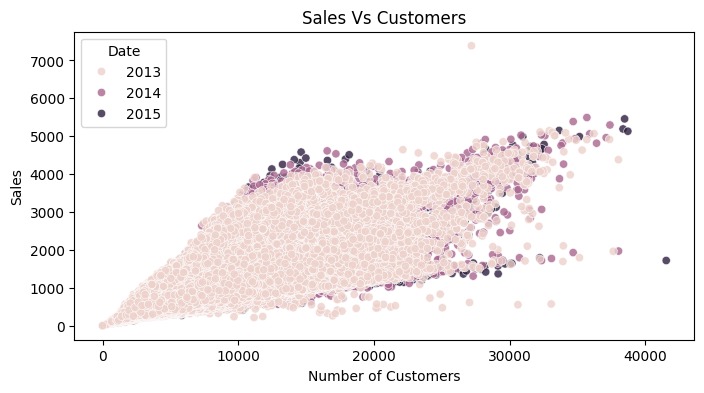

In [59]:
plt.figure(figsize=(8,4))
sns.scatterplot(x=merged_train_data.Sales, y=merged_train_data.Customers, hue=merged_train_data.index.year, alpha=0.8)
plt.title("Sales Vs Customers")
plt.xlabel('Number of Customers')
plt.ylabel('Sales')
plt.show()

* How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?

In [60]:
# Compare average sales for Promo and non-Promo days
promo_sales = merged_train_data[merged_train_data['Promo'] == 1]['Sales'].mean()
non_promo_sales = merged_train_data[merged_train_data['Promo'] == 0]['Sales'].mean()
print(f"Average Sales on Promo days: {promo_sales}")
print(f"Average Sales on non-Promo days: {non_promo_sales}")

# Compare average number of customers for Promo and non-Promo days
promo_customers = merged_train_data[merged_train_data['Promo'] == 1]['Customers'].mean()
non_promo_customers = merged_train_data[merged_train_data['Promo'] == 0]['Customers'].mean()
print(f"Average Customers on Promo days: {promo_customers}")
print(f"Average Customers on non-Promo days: {non_promo_customers}")


# Calculate sales per customer for Promo and non-Promo days
promo_sales_per_customer = merged_train_data[merged_train_data['Promo'] == 1]['Sales'].sum() / merged_train_data[merged_train_data['Promo'] == 1]['Customers'].sum()
non_promo_sales_per_customer = merged_train_data[merged_train_data['Promo'] == 0]['Sales'].sum() / merged_train_data[merged_train_data['Promo'] == 0]['Customers'].sum()

print(f"Sales per Customer on Promo days: {promo_sales_per_customer}")
print(f"Sales per Customer on non-Promo days: {non_promo_sales_per_customer}")


Average Sales on Promo days: 8228.281239386994
Average Sales on non-Promo days: 5929.407603487516
Average Customers on Promo days: 844.4344010018679
Average Customers on non-Promo days: 696.856886476034
Sales per Customer on Promo days: 9.744133149507716
Sales per Customer on non-Promo days: 8.508788129327668


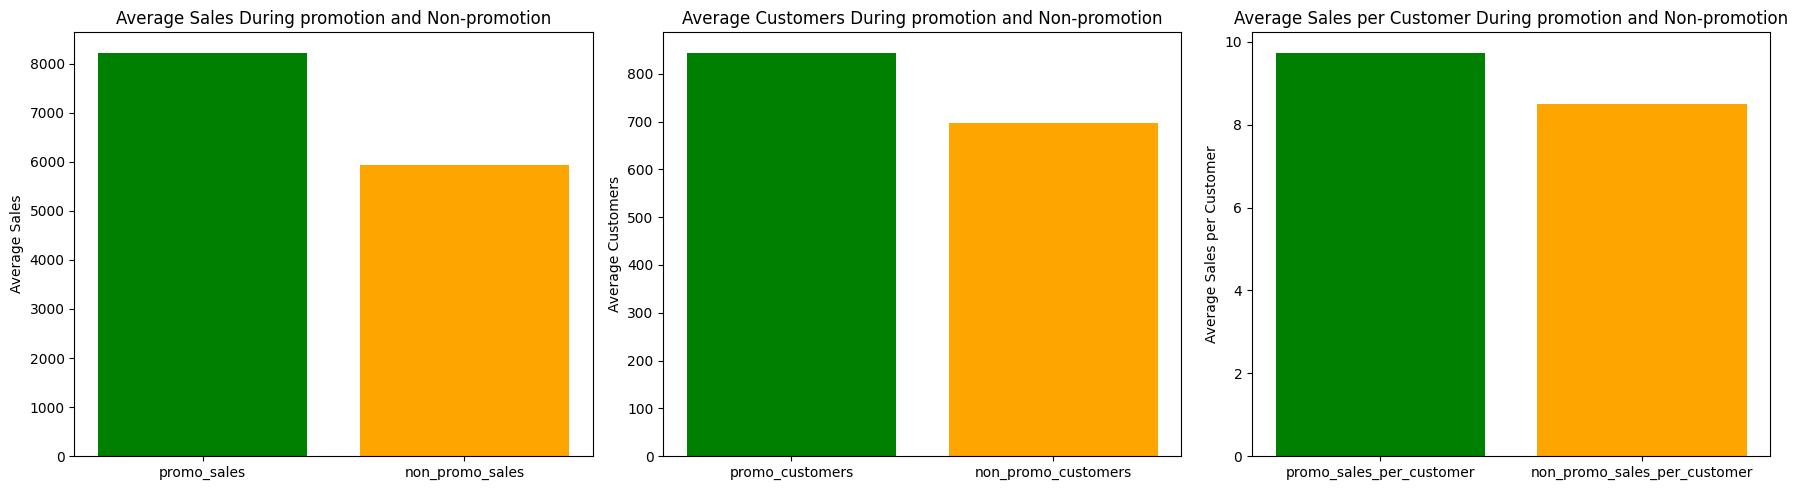

In [63]:
import matplotlib.pyplot as plt

# Data for plotting
sales_means_promo = [promo_sales, non_promo_sales]
customers_means_promo = [promo_customers, non_promo_customers]
sales_per_customer_means_promo = [promo_sales_per_customer, non_promo_sales_per_customer]
labels_sales = ['promo_sales', 'non_promo_sales']
labels_customers = ['promo_customers', 'non_promo_customers']
labels_sales_per_customer = ['promo_sales_per_customer', 'non_promo_sales_per_customer']

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns

# First plot: Average Sales
axes[0].bar(labels_sales, sales_means_promo, color=['green', 'orange'])
axes[0].set_title('Average Sales During promotion and Non-promotion')
axes[0].set_ylabel('Average Sales')

# Second plot: Average Customers
axes[1].bar(labels_customers, customers_means_promo, color=['green', 'orange'])
axes[1].set_title('Average Customers During promotion and Non-promotion')
axes[1].set_ylabel('Average Customers')

# Third plot: Sales per Customer
axes[2].bar(labels_sales_per_customer, sales_per_customer_means_promo, color=['green', 'orange'])
axes[2].set_title('Average Sales per Customer During promotion and Non-promotion')
axes[2].set_ylabel('Average Sales per Customer')

# Adjust layout
plt.tight_layout()
plt.show()


* Could the promos be deployed in more effective ways? Which stores should promos be deployed in?


In [65]:
# Calculate sales during promo and non-promo periods
promo_sales = merged_train_data[merged_train_data['Promo'] == 1].groupby('Store')['Sales'].sum().reset_index()
promo_sales.columns = ['Store', 'PromoSales']

non_promo_sales = merged_train_data[merged_train_data['Promo'] == 0].groupby('Store')['Sales'].sum().reset_index()
non_promo_sales.columns = ['Store', 'NonPromoSales']

# Merge the two DataFrames
sales_comparison = pd.merge(promo_sales, non_promo_sales, on='Store', how='outer')

# Calculate sales growth
sales_comparison['SalesGrowth'] = ((sales_comparison['PromoSales'] - sales_comparison['NonPromoSales']) / sales_comparison['NonPromoSales'].replace(0, np.nan)) * 100

# Fill NaN values with 0 where there were no non-promo sales
sales_comparison.fillna(0, inplace=True)

# Keep only relevant columns
sales_growth = sales_comparison[['Store', 'SalesGrowth']]
print(sales_growth)


      Store  SalesGrowth
0         1    -0.363946
1         2    33.735866
2         3    34.210947
3         4    -2.347269
4         5    42.388824
...     ...          ...
1110   1111    28.708889
1111   1112    29.293773
1112   1113     2.898074
1113   1114    -7.708325
1114   1115     7.177338

[1115 rows x 2 columns]


In [70]:
# Calculate customer during promo and non-promo periods
promo_customers = merged_train_data[merged_train_data['Promo'] == 1].groupby('Store')['Customers'].sum().reset_index()
promo_customers.columns = ['Store', 'promocustomers']

non_promo_customers = merged_train_data[merged_train_data['Promo'] == 0].groupby('Store')['Customers'].sum().reset_index()
non_promo_customers.columns = ['Store', 'Nonpromocustomers']

# Merge the two DataFrames
customer_comparison = pd.merge(promo_customers, non_promo_customers, on='Store', how='outer')

# Calculate customer growth
customer_comparison['customerGrowth'] = ((customer_comparison['promocustomers'] - customer_comparison['Nonpromocustomers']) / customer_comparison['Nonpromocustomers'].replace(0, np.nan)) * 100

# Fill NaN values with 0 where there were no non-promo customer
customer_comparison.fillna(0, inplace=True)

# Keep only relevant columns
customer_growth = customer_comparison[['Store', 'customerGrowth']]
print(customer_growth)


      Store  customerGrowth
0         1      -10.621413
1         2       14.429895
2         3       10.279516
3         4       -9.984725
4         5       21.236337
...     ...             ...
1110   1111       13.277935
1111   1112       10.032954
1112   1113       -6.569037
1113   1114      -16.822287
1114   1115       -5.051927

[1115 rows x 2 columns]


In [72]:
# Merge sales growth and customer growth data
promo_effectiveness = pd.merge(sales_growth, customer_growth, on='Store')
promo_effectiveness.columns = ['Store', 'SalesGrowth', 'CustomerGrowth']
# Filter for effective promo deployment
effective_promos = promo_effectiveness[(promo_effectiveness['SalesGrowth'] > 10) & (promo_effectiveness['CustomerGrowth'] > 5)]


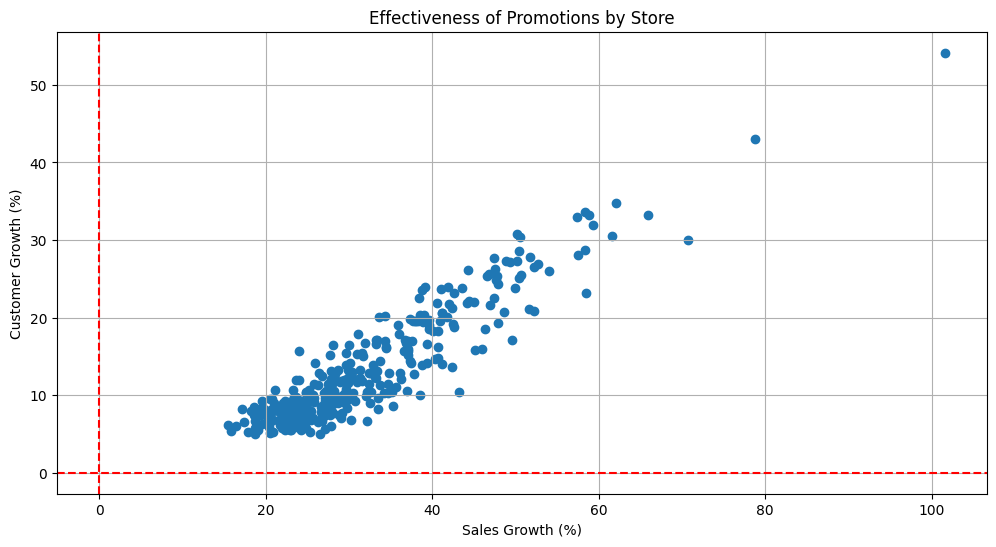

In [73]:
import matplotlib.pyplot as plt

# Plotting the effective promo stores
plt.figure(figsize=(12, 6))
plt.scatter(effective_promos['SalesGrowth'], effective_promos['CustomerGrowth'])
plt.title('Effectiveness of Promotions by Store')
plt.xlabel('Sales Growth (%)')
plt.ylabel('Customer Growth (%)')
plt.axhline(0, color='red', linestyle='--')
plt.axvline(0, color='red', linestyle='--')
plt.grid()
plt.show()


In [76]:
effective_promos

,Store,SalesGrowth,CustomerGrowth
1,2,33.735866,14.429895
2,3,34.210947,10.279516
4,5,42.388824,21.236337
5,6,19.311747,8.194007
7,8,37.063148,15.137643
...,...,...,...
1104,1105,22.994272,6.223270
1107,1108,58.787108,33.276248
1109,1110,31.375669,12.259052
1110,1111,28.708889,13.277935


In [75]:
effective_promos['Store'].unique()

array([   2,    3,    5,    6,    8,   13,   14,   17,   19,   21,   23,
         26,   27,   28,   32,   35,   39,   43,   44,   55,   57,   59,
         60,   62,   65,   67,   71,   72,   73,   78,   79,   82,   86,
         87,   88,   93,   94,   95,   96,   97,  102,  105,  117,  121,
        123,  133,  138,  143,  152,  153,  156,  164,  167,  168,  171,
        176,  177,  178,  181,  193,  198,  206,  218,  219,  220,  222,
        225,  234,  235,  236,  242,  253,  257,  261,  264,  265,  266,
        268,  269,  271,  272,  276,  286,  290,  291,  292,  294,  296,
        297,  307,  309,  313,  314,  318,  322,  324,  328,  329,  331,
        332,  344,  357,  366,  368,  374,  375,  376,  381,  382,  384,
        391,  392,  396,  400,  401,  404,  405,  417,  418,  426,  427,
        435,  436,  438,  443,  446,  448,  452,  454,  459,  460,  462,
        463,  466,  473,  474,  476,  478,  480,  483,  486,  489,  506,
        509,  510,  516,  517,  526,  535,  536,  5

* Trends of customer behavior during store opening and closing times, Which stores are open on all weekdays? How does that affect their sales on weekends? 


<Axes: xlabel='Open', ylabel='Customers'>

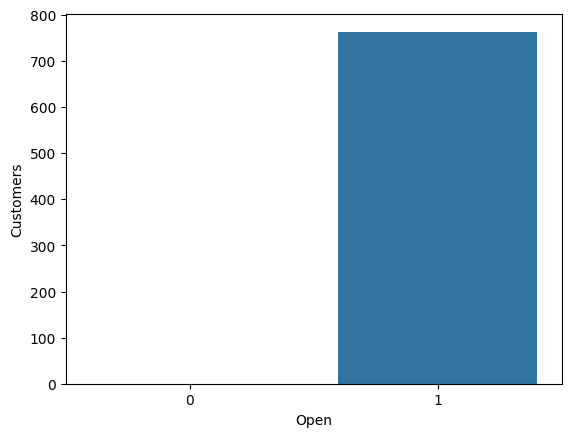

In [77]:
sns.barplot(data=merged_train_df, x='Open', y='Customers')

In [91]:
# Check which stores are open on all weekdays
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
open_stores = merged_train_df[merged_train_df['Open'] == 1]

# Extract the days of the week from the date
open_stores['DayOfWeek'] = pd.to_datetime(open_stores.index).day_name()

# Group by Store and check if they are open on all weekdays
stores_open_weekdays = open_stores.groupby('Store')['DayOfWeek'].apply(lambda x: set(weekdays).issubset(set(x))).reset_index(name='OpenAllWeekdays')

# Filter for stores that are open on all weekdays
stores_open_all_weekdays = stores_open_weekdays[stores_open_weekdays['OpenAllWeekdays'] == True]['Store']
print("Stores open on all weekdays:", stores_open_all_weekdays.tolist())


C:\Users\AII\AppData\Local\Temp\ipykernel_7056\2839380820.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Stores open on all weekdays: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216

In [92]:
# Filter data for weekends
weekend_days = ['Saturday', 'Sunday']
weekend_sales = merged_train_df[merged_train_df['DayOfWeek'].isin(weekend_days)]

# Calculate average sales for stores open on all weekdays
weekend_sales_open = weekend_sales[weekend_sales['Store'].isin(stores_open_all_weekdays)].groupby('Store')['Sales'].mean().reset_index()
weekend_sales_open.columns = ['Store', 'AvgWeekendSales_Open']

# Calculate average sales for stores not open on all weekdays
stores_not_open_all_weekdays = merged_train_df[~merged_train_df['Store'].isin(stores_open_all_weekdays)]['Store'].unique()
weekend_sales_not_open = weekend_sales[weekend_sales['Store'].isin(stores_not_open_all_weekdays)].groupby('Store')['Sales'].mean().reset_index()
weekend_sales_not_open.columns = ['Store', 'AvgWeekendSales_NotOpen']

# Merge the results
weekend_sales_comparison = pd.merge(weekend_sales_open, weekend_sales_not_open, on='Store', how='outer')
print(weekend_sales_comparison)


Empty DataFrame
Columns: [Store, AvgWeekendSales_Open, AvgWeekendSales_NotOpen]
Index: []


In [93]:
print("Stores open on all weekdays:", stores_open_all_weekdays.tolist())
print("Stores not open on all weekdays:", stores_not_open_all_weekdays)


Stores open on all weekdays: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216

* Check how the assortment type affects sales

<Axes: xlabel='Sales', ylabel='Assortment'>

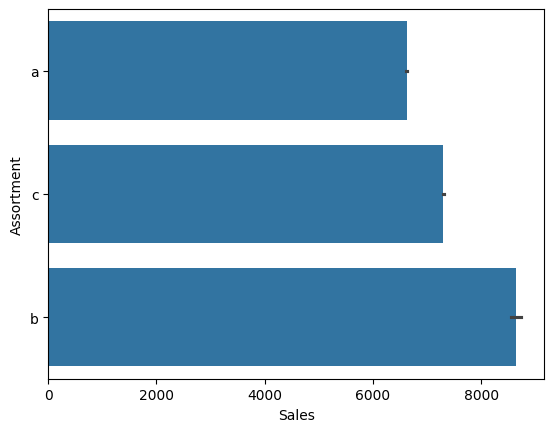

In [97]:
sns.barplot(data=merged_train_data, x='Sales', y='Assortment')

* How does the distance to the next competitor affect sales? What if the store and its competitors all happen to be in city centers, does the distance matter in that case?

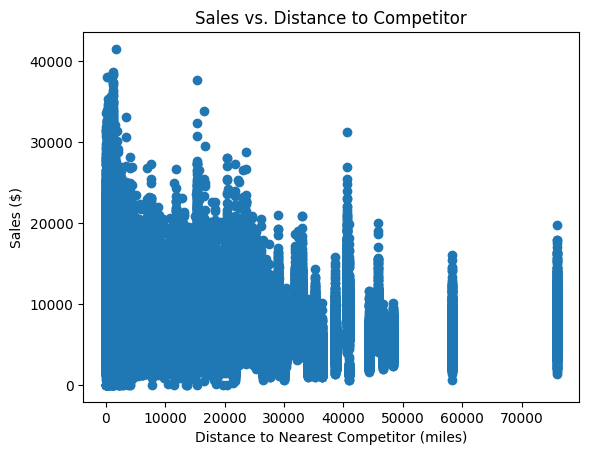

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1064.
Date:                Fri, 20 Sep 2024   Prob (F-statistic):          3.67e-233
Time:                        05:22:43   Log-Likelihood:            -7.9870e+06
No. Observations:              844392   AIC:                         1.597e+07
Df Residuals:                  844390   BIC:                         1.597e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                7032.3179    

In [114]:
import statsmodels.api as sm
import matplotlib.pyplot as plt


# Exploratory Data Analysis
plt.scatter(merged_train_data['CompetitionDistance'], merged_train_data['Sales'])
plt.xlabel('Distance to Nearest Competitor (miles)')
plt.ylabel('Sales ($)')
plt.title('Sales vs. Distance to Competitor')
plt.show()

# Regression Analysis
X = merged_train_data['CompetitionDistance']
y = merged_train_data['Sales']
X = sm.add_constant(X)  # Adds a constant term to the predictor

model = sm.OLS(y, X).fit()
print(model.summary())

# Interpret results based on coefficients


* How does the opening or reopening of new competitors affect stores? Check for stores with NA as competitor distance but later on have values for competitor distance

In [106]:
store_data['CompetitionDistance']

0        1270.0
1         570.0
2       14130.0
3         620.0
4       29910.0
         ...   
1110     1900.0
1111     1880.0
1112     9260.0
1113      870.0
1114     5350.0
Name: CompetitionDistance, Length: 1115, dtype: float64

In [109]:
# Identify stores with NA competitor distance that later have values
na_competitors = store_data[store_data['CompetitionDistance'].isna()]
reopened_stores = []

for store in na_competitors['Store']:
    if merged_train_data[(merged_train_data['Store'] == store) & (merged_train_data['CompetitionDistance'].notna())].shape[0] > 0:
        reopened_stores.append(store)

print("Stores that had NA competitor distance and later gained values:", reopened_stores)

Stores that had NA competitor distance and later gained values: [291, 622, 879]
